<a href="https://colab.research.google.com/github/tanigawa-kou/DeepLeraning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kerasを使用したディープラーニング
##画像認識を行う

##ライブラリーの読み込み

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

###学習済みモデルの読み込み

In [3]:
model = VGG16( weights='imagenet' )

###画像判定のための関数

In [4]:
def predict( filename , featuresize):
  img = image.load_img(filename, target_size=(224,224))

  x = image.img_to_array(img)

  x = np.expand_dims(x,axis=0)

  #学習モデルで判定を実行

  preds = model.predict(preprocess_input(x))

  results = decode_predictions(preds,top=featuresize)[0]

  return results

  #関数終わり


In [5]:
def showimg(filename, title, i):

  im = Image.open(filename)#画像ファイルを開く

  im_list = np.array(im)#画像ビットでーたをndarrayにする

  plt.subplot(2,5,i)

  plt.title(title)

  plt.axis("off")

  plt.imshow(im_list)

#関数終わり

###Kaggeにある学習データを利用する
https://www.kaggle.com/<br>
犬猫用判定用の作業データ
<br>
https://www.kaggle.com/c/dogs-vs-cats/data

##指定されたUTLからがいるをダウンロード


In [6]:
# wgetでwebからファイルをダウンロードする
# GoogleColabでコマンドを実行するときは、先頭に!マークを必ずつけること
#小さいファイルをGoogleドライブからDLする時は、以下のようにURLをつけるだけでOK！

!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt



/bin/bash: wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2 -O- : No such file or directory
/bin/bash:  sed -rn s/.*confirm=([0-9A-Za-z_]+).*/\1\n/p: No such file or directory
/bin/bash: wget --load-cookies /tmp/cookies.txt https://drive.google.com/uc?export=download&confirm=&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2 -O train.zip : No such file or directory
/bin/bash: wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2 -O- : No such file or directory
/bin/bash:  sed -rn s/.*confirm=([0-9A-Za-z_]+).*/\1\n/p: No such file or directory
/bin/bash: wget --load-cookies /tmp/cookies.txt https://drive.google.com/uc?export=download&confirm=&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2 -O test.zip : No such file or directory


##Colbに自分のGoogleアカウントのドライブをマウントする

In [7]:
#googleドライブを操作するモジュールをimport

from google.colab import drive

#googleドライブをマウント

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##DLしてきたファイルをマウントしたディレクトリーにコピーする

In [8]:
#　コピーファイルを置くディレクトリを作る

import os 

dir_path = "/content/dirive/My Drive/2022LATE"

#すでにディレクトリがあってもエラに使用

os.makedirs(dir_path,exist_ok = True)

!pwd #今いるディレクトリを表示

#ファイルをコピー

!cp train.zip "/content/drive/My Drive/2022LATE"

#test.zip はいったん使わないのでコピーしない

/content


##GoogleドライブからColabへファイルをコピー

In [9]:
!cp "/content/drive/My Drive/2022LATE/train.zip"

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


##zipファイルを解凍する

In [10]:
#unzipコマンドで解凍

!unzip -o -q "train.zip"

print("zip解凍完了")

zip解凍完了


##解凍した画像を使って画像判定させる

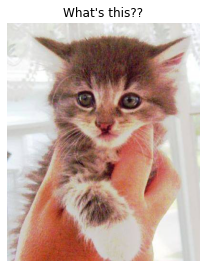

49152/35363 [=========================================] - 0s 0us/step
('n03958227', 'plastic_bag', 0.24324372)
('n02123045', 'tabby', 0.22490403)
('n02124075', 'Egyptian_cat', 0.07931747)
('n02123159', 'tiger_cat', 0.065413244)
('n02123394', 'Persian_cat', 0.0394602)
('n02808304', 'bath_towel', 0.03401416)
('n04209239', 'shower_curtain', 0.019263193)
('n03887697', 'paper_towel', 0.01877996)
('n04070727', 'refrigerator', 0.016609214)
('n04553703', 'washbasin', 0.016154714)


In [18]:
#画像を指定する変数
filename="train/cat.100.jpg"
plt.figure(figsize=(20,10))
for i in range(1):
  showimg (filename, "What's this??", i+1)
#ループ終わり
plt.show()

#表示した画像を判定
results = predict(filename, 10)
for result in results:
  print(result)